In [0]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import csv
with open('/content/drive/My Drive/binary_classifier_data/training.csv', 'r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        print(row)
csvFile.close()

['variable1;"variable2";"variable3";"variable4";"variable5";"variable6";"variable7";"variable8";"variable9";"variable10";"variable11";"variable12";"variable13";"variable14";"variable15";"variable17";"variable18";"variable19";"classLabel"']
['a;17', '92;5', '4e-05;"u";"g";"c";"v";1', '75;"f";"t";1;"t";"g";80;5;8e+05;"t";0;"no."']
['b;16', '92;3', '35e-05;"y";"p";"k";"v";0', '29;"f";"f";0;"f";"s";200;0;2e+06;NA;0;"no."']
['b;31', '25;0', '0001125;"u";"g";"ff";"ff";0;"f";"t";1;"f";"g";96;19;960000;"t";0;"no."']
['a;48', '17;0', '0001335;"u";"g";"i";"o";0', '335;"f";"f";0;"f";"g";0;120;0;NA;0;"no."']
['b;32', '33;0', '00035;"u";"g";"k";"v";0', '5;"f";"f";0;"t";"g";232;0;2320000;"f";0;"no."']
['a;34', '83;0', '000125;"y";"p";"i";"h";0', '5;"f";"f";0;"t";"g";160;0;1600000;"f";0;"no."']
['a;26', '17;2e-04;"u";"g";"j";"j";0;"f";"f";0;"t";"g";276;1;2760000;NA;0;"no."']
['b;21', '17;8', '75e-05;"y";"p";"c";"h";0', '25;"f";"f";0;"f";"g";280;204;2800000;NA;0;"no."']
['b;28', '92;3', '75e-05;"u";"g

In [0]:
initial_data = pd.read_csv('/content/drive/My Drive/binary_classifier_data/training.csv', sep='[;]', engine='python')

In [5]:
initial_data.head()

,"""variable1""","""variable2""","""variable3""","""variable4""","""variable5""","""variable6""","""variable7""","""variable8""","""variable9""","""variable10""","""variable11""","""variable12""","""variable13""","""variable14""","""variable15""","""variable17""","""variable18""","""variable19""","""classLabel"""
0,"""a""","17,92","5,4e-05","""u""","""g""","""c""","""v""","1,75","""f""","""t""",1,"""t""","""g""",80.0,5,800000.0,"""t""",0,"""no."""
1,"""b""","16,92","3,35e-05","""y""","""p""","""k""","""v""","0,29","""f""","""f""",0,"""f""","""s""",200.0,0,2000000.0,NaN,0,"""no."""
2,"""b""","31,25","0,0001125","""u""","""g""","""ff""","""ff""",0,"""f""","""t""",1,"""f""","""g""",96.0,19,960000.0,"""t""",0,"""no."""
3,"""a""","48,17","0,0001335","""u""","""g""","""i""","""o""","0,335","""f""","""f""",0,"""f""","""g""",0.0,120,0.0,NaN,0,"""no."""
4,"""b""","32,33","0,00035","""u""","""g""","""k""","""v""","0,5","""f""","""f""",0,"""t""","""g""",232.0,0,2320000.0,"""f""",0,"""no."""


In [6]:
initial_data.head(30)

,"""variable1""","""variable2""","""variable3""","""variable4""","""variable5""","""variable6""","""variable7""","""variable8""","""variable9""","""variable10""","""variable11""","""variable12""","""variable13""","""variable14""","""variable15""","""variable17""","""variable18""","""variable19""","""classLabel"""
0,"""a""","17,92","5,4e-05","""u""","""g""","""c""","""v""","1,75","""f""","""t""",1,"""t""","""g""",80.0,5,800000.0,"""t""",0,"""no."""
1,"""b""","16,92","3,35e-05","""y""","""p""","""k""","""v""","0,29","""f""","""f""",0,"""f""","""s""",200.0,0,2000000.0,NaN,0,"""no."""
2,"""b""","31,25","0,0001125","""u""","""g""","""ff""","""ff""",0,"""f""","""t""",1,"""f""","""g""",96.0,19,960000.0,"""t""",0,"""no."""
3,"""a""","48,17","0,0001335","""u""","""g""","""i""","""o""","0,335","""f""","""f""",0,"""f""","""g""",0.0,120,0.0,NaN,0,"""no."""
4,"""b""","32,33","0,00035","""u""","""g""","""k""","""v""","0,5","""f""","""f""",0,"""t""","""g""",232.0,0,2320000.0,"""f""",0,"""no."""
5,"""a""","34,83","0,000125","""y""","""p""","""i""","""h""","0,5","""f""","""f""",0,"""t""","""g""",160.0,0,1600000.0,"""f""",0,"""no."""
6,"""a""","26,17",2e-04,"""u""","""g""","""j""","""j""",0,"""f""","""f""",0,"""t""","""g""",276.0,1,2760000.0,NaN,0,"""no."""
7,"""b""","21,17","8,75e-05","""y""","""p""","""c""","""h""","0,25","""f""","""f""",0,"""f""","""g""",280.0,204,2800000.0,NaN,0,"""no."""
8,"""b""","28,92","3,75e-05","""u""","""g""","""c""","""v""","0,29","""f""","""f""",0,"""f""","""g""",220.0,140,2200000.0,NaN,0,"""no."""
9,"""b""","18,17","0,001025","""u""","""g""","""c""","""h""","1,085","""f""","""f""",0,"""f""","""g""",320.0,13,3200000.0,NaN,0,"""no."""


In [7]:
initial_data.describe()

,"""variable11""","""variable14""","""variable15""","""variable17""","""variable19"""
count,3700.000000,3600.000000,3700.000000,3.600000e+03,3700.000000
mean,4.160000,162.695000,2246.705946,1.626950e+06,0.925405
std,6.750553,156.045682,8708.571126,1.560457e+06,0.262772
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000e+00,1.000000
50%,2.000000,120.000000,113.000000,1.200000e+06,1.000000
75%,6.000000,280.000000,1059.750000,2.800000e+06,1.000000
max,67.000000,1160.000000,100000.000000,1.160000e+07,1.000000


In [8]:
initial_data.isna().sum()

"variable1"       39
"variable2"       39
"variable3"        0
"variable4"       64
"variable5"       64
"variable6"       66
"variable7"       66
"variable8"        0
"variable9"        0
"variable10"       0
"variable11"       0
"variable12"       0
"variable13"       0
"variable14"     100
"variable15"       0
"variable17"     100
"variable18"    2145
"variable19"       0
"classLabel"       0
dtype: int64

In [9]:
initial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 19 columns):
"variable1"     3661 non-null object
"variable2"     3661 non-null object
"variable3"     3700 non-null object
"variable4"     3636 non-null object
"variable5"     3636 non-null object
"variable6"     3634 non-null object
"variable7"     3634 non-null object
"variable8"     3700 non-null object
"variable9"     3700 non-null object
"variable10"    3700 non-null object
"variable11"    3700 non-null int64
"variable12"    3700 non-null object
"variable13"    3700 non-null object
"variable14"    3600 non-null float64
"variable15"    3700 non-null int64
"variable17"    3600 non-null float64
"variable18"    1555 non-null object
"variable19"    3700 non-null int64
"classLabel"    3700 non-null object
dtypes: float64(2), int64(3), object(14)
memory usage: 549.3+ KB


In [0]:
variable 18 correlates with variabl 10

ValueError: ignored

<Figure size 720x720 with 0 Axes>

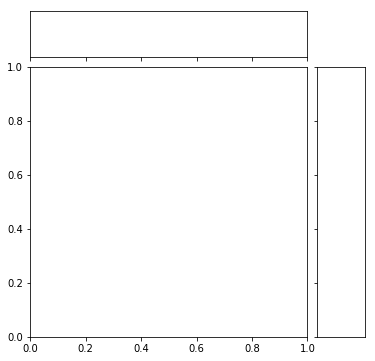

In [16]:
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
plt.figure(figsize = (10,10))
sns.jointplot(x='"variable10"', y='"variable18"', data=initial_data);

In [0]:
initial_data.drop(['"variable18"'], axis=1, inplace=True)

In [11]:
initial_data.head()

,"""variable1""","""variable2""","""variable3""","""variable4""","""variable5""","""variable6""","""variable7""","""variable8""","""variable9""","""variable10""","""variable11""","""variable12""","""variable13""","""variable14""","""variable15""","""variable17""","""variable19""","""classLabel"""
0,"""a""","17,92","5,4e-05","""u""","""g""","""c""","""v""","1,75","""f""","""t""",1,"""t""","""g""",80.0,5,800000.0,0,"""no."""
1,"""b""","16,92","3,35e-05","""y""","""p""","""k""","""v""","0,29","""f""","""f""",0,"""f""","""s""",200.0,0,2000000.0,0,"""no."""
2,"""b""","31,25","0,0001125","""u""","""g""","""ff""","""ff""",0,"""f""","""t""",1,"""f""","""g""",96.0,19,960000.0,0,"""no."""
3,"""a""","48,17","0,0001335","""u""","""g""","""i""","""o""","0,335","""f""","""f""",0,"""f""","""g""",0.0,120,0.0,0,"""no."""
4,"""b""","32,33","0,00035","""u""","""g""","""k""","""v""","0,5","""f""","""f""",0,"""t""","""g""",232.0,0,2320000.0,0,"""no."""


In [12]:
initial_data['"variable19"'].unique()

array([0, 1])

In [13]:
initial_data['"classLabel"'].unique()

array(['"no."', '"yes."'], dtype=object)

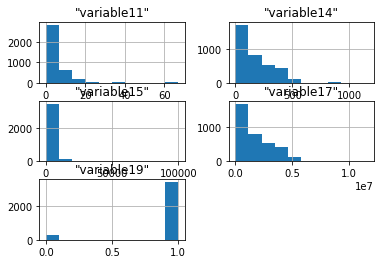

In [17]:
initial_data.hist()
plt.show()

In [18]:
correlations = initial_data.corr()
# plot correlation matrix
fig = plt.figure()
plt.show()

<Figure size 432x288 with 0 Axes>

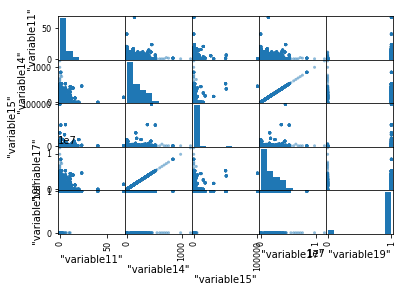

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(initial_data)
plt.show()

In [0]:
initial_data['"classLabel"'] = initial_data['"classLabel"'].map({'"yes."': 1, '"no."': 0})

In [21]:
initial_data.head()

,"""variable1""","""variable2""","""variable3""","""variable4""","""variable5""","""variable6""","""variable7""","""variable8""","""variable9""","""variable10""","""variable11""","""variable12""","""variable13""","""variable14""","""variable15""","""variable17""","""variable19""","""classLabel"""
0,"""a""","17,92","5,4e-05","""u""","""g""","""c""","""v""","1,75","""f""","""t""",1,"""t""","""g""",80.0,5,800000.0,0,0
1,"""b""","16,92","3,35e-05","""y""","""p""","""k""","""v""","0,29","""f""","""f""",0,"""f""","""s""",200.0,0,2000000.0,0,0
2,"""b""","31,25","0,0001125","""u""","""g""","""ff""","""ff""",0,"""f""","""t""",1,"""f""","""g""",96.0,19,960000.0,0,0
3,"""a""","48,17","0,0001335","""u""","""g""","""i""","""o""","0,335","""f""","""f""",0,"""f""","""g""",0.0,120,0.0,0,0
4,"""b""","32,33","0,00035","""u""","""g""","""k""","""v""","0,5","""f""","""f""",0,"""t""","""g""",232.0,0,2320000.0,0,0


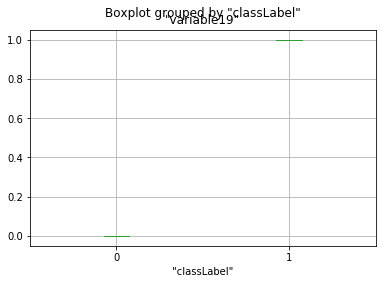

In [22]:

boxplot=initial_data.boxplot(by='"classLabel"', column='"variable19"')


In [23]:
initial_data['"classLabel"'].equals(initial_data['"variable19"'])

True

In [0]:
class 19 equal classlabel

In [0]:
initial_data.drop(['"variable19"'], axis=1, inplace=True)

In [25]:
initial_data.head()

,"""variable1""","""variable2""","""variable3""","""variable4""","""variable5""","""variable6""","""variable7""","""variable8""","""variable9""","""variable10""","""variable11""","""variable12""","""variable13""","""variable14""","""variable15""","""variable17""","""classLabel"""
0,"""a""","17,92","5,4e-05","""u""","""g""","""c""","""v""","1,75","""f""","""t""",1,"""t""","""g""",80.0,5,800000.0,0
1,"""b""","16,92","3,35e-05","""y""","""p""","""k""","""v""","0,29","""f""","""f""",0,"""f""","""s""",200.0,0,2000000.0,0
2,"""b""","31,25","0,0001125","""u""","""g""","""ff""","""ff""",0,"""f""","""t""",1,"""f""","""g""",96.0,19,960000.0,0
3,"""a""","48,17","0,0001335","""u""","""g""","""i""","""o""","0,335","""f""","""f""",0,"""f""","""g""",0.0,120,0.0,0
4,"""b""","32,33","0,00035","""u""","""g""","""k""","""v""","0,5","""f""","""f""",0,"""t""","""g""",232.0,0,2320000.0,0


In [26]:
initial_data.head(50)

,"""variable1""","""variable2""","""variable3""","""variable4""","""variable5""","""variable6""","""variable7""","""variable8""","""variable9""","""variable10""","""variable11""","""variable12""","""variable13""","""variable14""","""variable15""","""variable17""","""classLabel"""
0,"""a""","17,92","5,4e-05","""u""","""g""","""c""","""v""","1,75","""f""","""t""",1,"""t""","""g""",80.0,5,800000.0,0
1,"""b""","16,92","3,35e-05","""y""","""p""","""k""","""v""","0,29","""f""","""f""",0,"""f""","""s""",200.0,0,2000000.0,0
2,"""b""","31,25","0,0001125","""u""","""g""","""ff""","""ff""",0,"""f""","""t""",1,"""f""","""g""",96.0,19,960000.0,0
3,"""a""","48,17","0,0001335","""u""","""g""","""i""","""o""","0,335","""f""","""f""",0,"""f""","""g""",0.0,120,0.0,0
4,"""b""","32,33","0,00035","""u""","""g""","""k""","""v""","0,5","""f""","""f""",0,"""t""","""g""",232.0,0,2320000.0,0
5,"""a""","34,83","0,000125","""y""","""p""","""i""","""h""","0,5","""f""","""f""",0,"""t""","""g""",160.0,0,1600000.0,0
6,"""a""","26,17",2e-04,"""u""","""g""","""j""","""j""",0,"""f""","""f""",0,"""t""","""g""",276.0,1,2760000.0,0
7,"""b""","21,17","8,75e-05","""y""","""p""","""c""","""h""","0,25","""f""","""f""",0,"""f""","""g""",280.0,204,2800000.0,0
8,"""b""","28,92","3,75e-05","""u""","""g""","""c""","""v""","0,29","""f""","""f""",0,"""f""","""g""",220.0,140,2200000.0,0
9,"""b""","18,17","0,001025","""u""","""g""","""c""","""h""","1,085","""f""","""f""",0,"""f""","""g""",320.0,13,3200000.0,0


In [27]:
initial_data.isna().sum()

"variable1"      39
"variable2"      39
"variable3"       0
"variable4"      64
"variable5"      64
"variable6"      66
"variable7"      66
"variable8"       0
"variable9"       0
"variable10"      0
"variable11"      0
"variable12"      0
"variable13"      0
"variable14"    100
"variable15"      0
"variable17"    100
"classLabel"      0
dtype: int64

In [0]:
def fill_nan_categorical(variable_name):
  #creates a random permuation of the categorical values
  permutation = np.random.permutation(initial_data[variable_name])

  #erase the empty values
  empty_is = np.where(permutation == "")
  permutation = np.delete(permutation, empty_is)

  #replace all empty values of the dataframe[field]
  end = len(permutation)
  initial_data[variable_name] = initial_data[variable_name].apply(lambda x: permutation[np.random.randint(end)] if pd.isnull(x) else x)


In [0]:
fill_nan_categorical('"variable1"')



In [33]:
fill_nan_categorical('"variable4"')
fill_nan_categorical('"variable5"')
fill_nan_categorical('"variable6"')
fill_nan_categorical('"variable7"')
initial_data.isna().sum()

"variable1"       0
"variable2"      39
"variable3"       0
"variable4"       0
"variable5"       0
"variable6"       0
"variable7"       0
"variable8"       0
"variable9"       0
"variable10"      0
"variable11"      0
"variable12"      0
"variable13"      0
"variable14"    100
"variable15"      0
"variable17"    100
"classLabel"      0
dtype: int64

In [34]:
initial_data['"variable2"'].unique()

array(['17,92', '16,92', '31,25', '48,17', '32,33', '34,83', '26,17',
       '21,17', '28,92', '18,17', '24,75', '31,75', '18,25', '17,58',
       '51,83', '26,67', '31,42', '25,67', '33,75', '32,75', '39,83',
       '40,33', '35,25', '24,33', '15,75', '45', '30,42', nan, '17,25',
       '38,58', '22,67', '49', '27,83', '16,5', '36,67', '47,25', '33,67',
       '33,17', '25', '48,5', '37,42', '18', '56,5', '25,75', '22,58',
       '32', '40,83', '59,67', '42,5', '28,08', '37,75', '53,92', '47,67',
       '23,25', '54,58', '34,25', '27,58', '46', '60,92', '47,42',
       '37,33', '33,25', '24,58', '21,83', '15,17', '22,92', '69,5', '33',
       '23', '22', '20,75', '20,67', '48,75', '22,75', '42,25', '27,67',
       '28,75', '23,5', '29,5', '31,92', '18,83', '26,75', '27,17',
       '47,17', '23,75', '41,58', '26,33', '39,42', '44,83', '50,75',
       '19,17', '21,5', '25,58', '20,42', '44,17', '34,75', '20,5',
       '22,08', '42,83', '18,92', '52,83', '36,25', '20,33', '28,17',
      

In [0]:
var2=initial_data['"variable2"']
var3=initial_data['"variable3"']
var8=initial_data['"variable8"']

In [0]:
initial_data['"variable2"'] = [x.replace(',', '.') for x in initial_data['"variable2"']]

initial_data['"variable2"'] = initial_data['"variable2"'].astype(float)


initial_data['"variable3"'] = [x.replace(',', '.') for x in initial_data['"variable3"']]

initial_data['"variable3"'] = initial_data['"variable3"'].astype(float)


initial_data['"variable8"'] = [x.replace(',', '.') for x in initial_data['"variable8"']]

initial_data['"variable8"'] = initial_data['"variable8"'].astype(float)


In [0]:
initial_data['"variable2"'] = initial_data['"variable2"'].astype(str)
initial_data['"variable2"'] = [x.replace(',', '.') for x in initial_data['"variable2"']]

initial_data['"variable2"'] = initial_data['"variable2"'].astype(float)


In [0]:
initial_data.stack().str.replace(',','.').unstack()

In [46]:
initial_data.head(50)

,"""variable1""","""variable2""","""variable3""","""variable4""","""variable5""","""variable6""","""variable7""","""variable8""","""variable9""","""variable10""","""variable11""","""variable12""","""variable13""","""variable14""","""variable15""","""variable17""","""classLabel"""
0,"""a""",17.92,0.000054,"""u""","""g""","""c""","""v""",1.750,"""f""","""t""",1,"""t""","""g""",80.0,5,800000.0,0
1,"""b""",16.92,0.000034,"""y""","""p""","""k""","""v""",0.290,"""f""","""f""",0,"""f""","""s""",200.0,0,2000000.0,0
2,"""b""",31.25,0.000112,"""u""","""g""","""ff""","""ff""",0.000,"""f""","""t""",1,"""f""","""g""",96.0,19,960000.0,0
3,"""a""",48.17,0.000133,"""u""","""g""","""i""","""o""",0.335,"""f""","""f""",0,"""f""","""g""",0.0,120,0.0,0
4,"""b""",32.33,0.000350,"""u""","""g""","""k""","""v""",0.500,"""f""","""f""",0,"""t""","""g""",232.0,0,2320000.0,0
5,"""a""",34.83,0.000125,"""y""","""p""","""i""","""h""",0.500,"""f""","""f""",0,"""t""","""g""",160.0,0,1600000.0,0
6,"""a""",26.17,0.000200,"""u""","""g""","""j""","""j""",0.000,"""f""","""f""",0,"""t""","""g""",276.0,1,2760000.0,0
7,"""b""",21.17,0.000087,"""y""","""p""","""c""","""h""",0.250,"""f""","""f""",0,"""f""","""g""",280.0,204,2800000.0,0
8,"""b""",28.92,0.000037,"""u""","""g""","""c""","""v""",0.290,"""f""","""f""",0,"""f""","""g""",220.0,140,2200000.0,0
9,"""b""",18.17,0.001025,"""u""","""g""","""c""","""h""",1.085,"""f""","""f""",0,"""f""","""g""",320.0,13,3200000.0,0


In [47]:
initial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 17 columns):
"variable1"     3700 non-null object
"variable2"     3661 non-null float64
"variable3"     3700 non-null float64
"variable4"     3700 non-null object
"variable5"     3700 non-null object
"variable6"     3700 non-null object
"variable7"     3700 non-null object
"variable8"     3700 non-null float64
"variable9"     3700 non-null object
"variable10"    3700 non-null object
"variable11"    3700 non-null int64
"variable12"    3700 non-null object
"variable13"    3700 non-null object
"variable14"    3600 non-null float64
"variable15"    3700 non-null int64
"variable17"    3600 non-null float64
"classLabel"    3700 non-null int64
dtypes: float64(5), int64(3), object(9)
memory usage: 491.5+ KB


In [48]:
initial_data.isna().sum()

"variable1"       0
"variable2"      39
"variable3"       0
"variable4"       0
"variable5"       0
"variable6"       0
"variable7"       0
"variable8"       0
"variable9"       0
"variable10"      0
"variable11"      0
"variable12"      0
"variable13"      0
"variable14"    100
"variable15"      0
"variable17"    100
"classLabel"      0
dtype: int64

In [0]:
initial_data['"variable2"'].fillna((initial_data['"variable2"'].mean()), inplace=True)
initial_data['"variable14"'].fillna((initial_data['"variable14"'].mean()), inplace=True)
initial_data['"variable17"'].fillna((initial_data['"variable17"'].mean()), inplace=True)

In [50]:
initial_data.isna().sum()

"variable1"     0
"variable2"     0
"variable3"     0
"variable4"     0
"variable5"     0
"variable6"     0
"variable7"     0
"variable8"     0
"variable9"     0
"variable10"    0
"variable11"    0
"variable12"    0
"variable13"    0
"variable14"    0
"variable15"    0
"variable17"    0
"classLabel"    0
dtype: int64

In [52]:
!pip install category_encoders

     |████████████████████████████████| 92kB 3.5MB/s 


In [0]:
import category_encoders as ce

In [54]:
initial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 17 columns):
"variable1"     3700 non-null object
"variable2"     3700 non-null float64
"variable3"     3700 non-null float64
"variable4"     3700 non-null object
"variable5"     3700 non-null object
"variable6"     3700 non-null object
"variable7"     3700 non-null object
"variable8"     3700 non-null float64
"variable9"     3700 non-null object
"variable10"    3700 non-null object
"variable11"    3700 non-null int64
"variable12"    3700 non-null object
"variable13"    3700 non-null object
"variable14"    3700 non-null float64
"variable15"    3700 non-null int64
"variable17"    3700 non-null float64
"classLabel"    3700 non-null int64
dtypes: float64(5), int64(3), object(9)
memory usage: 491.5+ KB


In [55]:
from category_encoders import *

# use binary encoding to encode two categorical features
enc = BinaryEncoder(cols=['"variable1"','"variable4"','"variable5"','"variable6"','"variable7"','"variable9"','"variable10"','"variable12"','"variable13"']).fit(initial_data)

# transform the dataset
numeric_dataset = enc.transform(initial_data)


numeric_dataset.head()

,"""variable1""_0","""variable1""_1","""variable2""","""variable3""","""variable4""_0","""variable4""_1","""variable4""_2","""variable5""_0","""variable5""_1","""variable5""_2","""variable6""_0","""variable6""_1","""variable6""_2","""variable6""_3","""variable6""_4","""variable7""_0","""variable7""_1","""variable7""_2","""variable7""_3","""variable7""_4","""variable8""","""variable9""_0","""variable9""_1","""variable10""_0","""variable10""_1","""variable11""","""variable12""_0","""variable12""_1","""variable13""_0","""variable13""_1","""variable13""_2","""variable14""","""variable15""","""variable17""","""classLabel"""
0,0,1,17.92,0.000054,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1.750,0,1,0,1,1,0,1,0,0,1,80.0,5,800000.0,0
1,1,0,16.92,0.000034,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0.290,0,1,1,0,0,1,0,0,1,0,200.0,0,2000000.0,0
2,1,0,31.25,0.000112,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0.000,0,1,0,1,1,1,0,0,0,1,96.0,19,960000.0,0
3,0,1,48.17,0.000133,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0.335,0,1,1,0,0,1,0,0,0,1,0.0,120,0.0,0
4,1,0,32.33,0.000350,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0.500,0,1,1,0,0,0,1,0,0,1,232.0,0,2320000.0,0


In [0]:
validation_set = pd.read_csv('/content/drive/My Drive/binary_classifier_data/validation.csv', sep='[;]', engine='python')

In [57]:
validation_set.head()

,"""variable1""","""variable2""","""variable3""","""variable4""","""variable5""","""variable6""","""variable7""","""variable8""","""variable9""","""variable10""","""variable11""","""variable12""","""variable13""","""variable14""","""variable15""","""variable17""","""variable18""","""variable19""","""classLabel"""
0,"""b""","32,33","0,00075","""u""","""g""","""e""","""bb""","1,585","""t""","""f""",0,"""t""","""s""",420.0,0,4200000.0,NaN,1,"""no."""
1,"""b""","23,58","0,000179","""u""","""g""","""c""","""v""","0,54","""f""","""f""",0,"""t""","""g""",136.0,1,1360000.0,NaN,0,"""no."""
2,"""b""","36,42","7,5e-05","""y""","""p""","""d""","""v""","0,585","""f""","""f""",0,"""f""","""g""",240.0,3,2400000.0,NaN,1,"""no."""
3,"""b""","18,42","0,0010415","""y""","""p""","""aa""","""v""","0,125","""t""","""f""",0,"""f""","""g""",120.0,375,1200000.0,NaN,0,"""no."""
4,"""b""","24,5","0,0013335","""y""","""p""","""aa""","""v""","0,04","""f""","""f""",0,"""t""","""g""",120.0,475,1200000.0,"""f""",1,"""no."""


In [58]:
validation_set.isna().sum()

"variable1"       3
"variable2"       3
"variable3"       0
"variable4"       2
"variable5"       2
"variable6"       3
"variable7"       3
"variable8"       0
"variable9"       0
"variable10"      0
"variable11"      0
"variable12"      0
"variable13"      0
"variable14"      3
"variable15"      0
"variable17"      3
"variable18"    111
"variable19"      0
"classLabel"      0
dtype: int64

In [0]:
validation_set.drop(['"variable19"'], axis=1, inplace=True)
validation_set.drop(['"variable18"'], axis=1, inplace=True)

In [61]:
validation_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
"variable1"     197 non-null object
"variable2"     197 non-null object
"variable3"     200 non-null object
"variable4"     198 non-null object
"variable5"     198 non-null object
"variable6"     197 non-null object
"variable7"     197 non-null object
"variable8"     200 non-null object
"variable9"     200 non-null object
"variable10"    200 non-null object
"variable11"    200 non-null int64
"variable12"    200 non-null object
"variable13"    200 non-null object
"variable14"    197 non-null float64
"variable15"    200 non-null int64
"variable17"    197 non-null float64
"classLabel"    200 non-null object
dtypes: float64(2), int64(2), object(13)
memory usage: 26.6+ KB


In [60]:
validation_set.isna().sum()

"variable1"     3
"variable2"     3
"variable3"     0
"variable4"     2
"variable5"     2
"variable6"     3
"variable7"     3
"variable8"     0
"variable9"     0
"variable10"    0
"variable11"    0
"variable12"    0
"variable13"    0
"variable14"    3
"variable15"    0
"variable17"    3
"classLabel"    0
dtype: int64

In [0]:
validation_set['"variable17"'].fillna((validation_set['"variable17"'].mean()), inplace=True)

In [0]:
validation_set['"variable14"'].fillna((validation_set['"variable14"'].mean()), inplace=True)

In [0]:
validation_set['"variable2"'] = validation_set['"variable2"'].astype(str)
validation_set['"variable2"'] = [x.replace(',', '.') for x in validation_set['"variable2"']]

validation_set['"variable2"'] = validation_set['"variable2"'].astype(float)


validation_set['"variable3"'] = [x.replace(',', '.') for x in validation_set['"variable3"']]

validation_set['"variable3"'] = validation_set['"variable3"'].astype(float)


validation_set['"variable8"'] = [x.replace(',', '.') for x in validation_set['"variable8"']]

validation_set['"variable8"'] = validation_set['"variable8"'].astype(float)

In [66]:
validation_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
"variable1"     197 non-null object
"variable2"     197 non-null float64
"variable3"     200 non-null float64
"variable4"     198 non-null object
"variable5"     198 non-null object
"variable6"     197 non-null object
"variable7"     197 non-null object
"variable8"     200 non-null float64
"variable9"     200 non-null object
"variable10"    200 non-null object
"variable11"    200 non-null int64
"variable12"    200 non-null object
"variable13"    200 non-null object
"variable14"    200 non-null float64
"variable15"    200 non-null int64
"variable17"    200 non-null float64
"classLabel"    200 non-null object
dtypes: float64(5), int64(2), object(10)
memory usage: 26.6+ KB


In [0]:
validation_set['"classLabel"'] = validation_set['"classLabel"'].map({'"yes."': 1, '"no."': 0})

In [68]:
validation_set.head()

,"""variable1""","""variable2""","""variable3""","""variable4""","""variable5""","""variable6""","""variable7""","""variable8""","""variable9""","""variable10""","""variable11""","""variable12""","""variable13""","""variable14""","""variable15""","""variable17""","""classLabel"""
0,"""b""",32.33,0.000750,"""u""","""g""","""e""","""bb""",1.585,"""t""","""f""",0,"""t""","""s""",420.0,0,4200000.0,0
1,"""b""",23.58,0.000179,"""u""","""g""","""c""","""v""",0.540,"""f""","""f""",0,"""t""","""g""",136.0,1,1360000.0,0
2,"""b""",36.42,0.000075,"""y""","""p""","""d""","""v""",0.585,"""f""","""f""",0,"""f""","""g""",240.0,3,2400000.0,0
3,"""b""",18.42,0.001042,"""y""","""p""","""aa""","""v""",0.125,"""t""","""f""",0,"""f""","""g""",120.0,375,1200000.0,0
4,"""b""",24.50,0.001334,"""y""","""p""","""aa""","""v""",0.040,"""f""","""f""",0,"""t""","""g""",120.0,475,1200000.0,0


In [69]:
validation_set.isna().sum()

"variable1"     3
"variable2"     3
"variable3"     0
"variable4"     2
"variable5"     2
"variable6"     3
"variable7"     3
"variable8"     0
"variable9"     0
"variable10"    0
"variable11"    0
"variable12"    0
"variable13"    0
"variable14"    0
"variable15"    0
"variable17"    0
"classLabel"    0
dtype: int64

In [0]:
def fill_nan_categorical__(variable_name):
  #creates a random permuation of the categorical values
  permutation = np.random.permutation(validation_set[variable_name])

  #erase the empty values
  empty_is = np.where(permutation == "")
  permutation = np.delete(permutation, empty_is)

  #replace all empty values of the dataframe[field]
  end = len(permutation)
  validation_set[variable_name] = validation_set[variable_name].apply(lambda x: permutation[np.random.randint(end)] if pd.isnull(x) else x)

In [0]:
fill_nan_categorical__('"variable1"')
fill_nan_categorical__('"variable4"')
fill_nan_categorical__('"variable5"')
fill_nan_categorical__('"variable6"')
fill_nan_categorical__('"variable7"')
validation_set['"variable2"'].fillna((validation_set['"variable2"'].mean()), inplace=True)

In [73]:
validation_set.isna().sum()

"variable1"     0
"variable2"     0
"variable3"     0
"variable4"     0
"variable5"     0
"variable6"     0
"variable7"     0
"variable8"     0
"variable9"     0
"variable10"    0
"variable11"    0
"variable12"    0
"variable13"    0
"variable14"    0
"variable15"    0
"variable17"    0
"classLabel"    0
dtype: int64

In [74]:
validation_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
"variable1"     200 non-null object
"variable2"     200 non-null float64
"variable3"     200 non-null float64
"variable4"     200 non-null object
"variable5"     200 non-null object
"variable6"     200 non-null object
"variable7"     200 non-null object
"variable8"     200 non-null float64
"variable9"     200 non-null object
"variable10"    200 non-null object
"variable11"    200 non-null int64
"variable12"    200 non-null object
"variable13"    200 non-null object
"variable14"    200 non-null float64
"variable15"    200 non-null int64
"variable17"    200 non-null float64
"classLabel"    200 non-null int64
dtypes: float64(5), int64(3), object(9)
memory usage: 26.6+ KB


In [75]:
# use binary encoding to encode two categorical features
enc = BinaryEncoder(cols=['"variable1"','"variable4"','"variable5"','"variable6"','"variable7"','"variable9"','"variable10"','"variable12"','"variable13"']).fit(validation_set)

# transform the dataset
validation_numeric = enc.transform(validation_set)


validation_numeric.head()

,"""variable1""_0","""variable1""_1","""variable2""","""variable3""","""variable4""_0","""variable4""_1","""variable5""_0","""variable5""_1","""variable6""_0","""variable6""_1","""variable6""_2","""variable6""_3","""variable6""_4","""variable7""_0","""variable7""_1","""variable7""_2","""variable7""_3","""variable8""","""variable9""_0","""variable9""_1","""variable10""_0","""variable10""_1","""variable11""","""variable12""_0","""variable12""_1","""variable13""_0","""variable13""_1","""variable13""_2","""variable14""","""variable15""","""variable17""","""classLabel"""
0,0,1,32.33,0.000750,0,1,0,1,0,0,0,0,1,0,0,0,1,1.585,0,1,0,1,0,0,1,0,0,1,420.0,0,4200000.0,0
1,0,1,23.58,0.000179,0,1,0,1,0,0,0,1,0,0,0,1,0,0.540,1,0,0,1,0,0,1,0,1,0,136.0,1,1360000.0,0
2,0,1,36.42,0.000075,1,0,1,0,0,0,0,1,1,0,0,1,0,0.585,1,0,0,1,0,1,0,0,1,0,240.0,3,2400000.0,0
3,0,1,18.42,0.001042,1,0,1,0,0,0,1,0,0,0,0,1,0,0.125,0,1,0,1,0,1,0,0,1,0,120.0,375,1200000.0,0
4,0,1,24.50,0.001334,1,0,1,0,0,0,1,0,0,0,0,1,0,0.040,1,0,0,1,0,0,1,0,1,0,120.0,475,1200000.0,0


In [0]:
y_train=numeric_dataset['"classLabel"']
numeric_dataset.drop(['"classLabel"'], axis=1, inplace=True)
y_test=validation_numeric['"classLabel"']
validation_numeric.drop(['"classLabel"'], axis=1, inplace=True)

In [0]:
validation_numeric['"variable4"_2'] = 0
validation_numeric['"variable5"_2'] = 0
validation_numeric['"variable7"_4'] = 0


In [0]:
Logistic Regression

In [77]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, numeric_dataset, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py

In [0]:
def cross_validate_(estimator, X, y=None, groups=None, scoring=None, cv=None,
                   n_jobs=1, verbose=0, fit_params=None,
                   pre_dispatch='2*n_jobs', return_train_score="warn"):
    """Evaluate metric(s) by cross-validation and also record fit/score times.
    Read more in the :ref:`User Guide <multimetric_cross_validation>`.
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    X : array-like
        The data to fit. Can be for example a list, or an array.
    y : array-like, optional, default: None
        The target variable to try to predict in the case of
        supervised learning.
    groups : array-like, with shape (n_samples,), optional
        Group labels for the samples used while splitting the dataset into
        train/test set.
    scoring : string, callable, list/tuple, dict or None, default: None
        A single string (see :ref:`scoring_parameter`) or a callable
        (see :ref:`scoring`) to evaluate the predictions on the test set.
        For evaluating multiple metrics, either give a list of (unique) strings
        or a dict with names as keys and callables as values.
        NOTE that when using custom scorers, each scorer should return a single
        value. Metric functions returning a list/array of values can be wrapped
        into multiple scorers that return one value each.
        See :ref:`multimetric_grid_search` for an example.
        If None, the estimator's default scorer (if available) is used.
    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross validation,
          - integer, to specify the number of folds in a `(Stratified)KFold`,
          - An object to be used as a cross-validation generator.
          - An iterable yielding train, test splits.
        For integer/None inputs, if the estimator is a classifier and ``y`` is
        either binary or multiclass, :class:`StratifiedKFold` is used. In all
        other cases, :class:`KFold` is used.
        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validation strategies that can be used here.
    n_jobs : integer, optional
        The number of CPUs to use to do the computation. -1 means
        'all CPUs'.
    verbose : integer, optional
        The verbosity level.
    fit_params : dict, optional
        Parameters to pass to the fit method of the estimator.
    pre_dispatch : int, or string, optional
        Controls the number of jobs that get dispatched during parallel
        execution. Reducing this number can be useful to avoid an
        explosion of memory consumption when more jobs get dispatched
        than CPUs can process. This parameter can be:
            - None, in which case all the jobs are immediately
              created and spawned. Use this for lightweight and
              fast-running jobs, to avoid delays due to on-demand
              spawning of the jobs
            - An int, giving the exact number of total jobs that are
              spawned
            - A string, giving an expression as a function of n_jobs,
              as in '2*n_jobs'
    return_train_score : boolean, optional
        Whether to include train scores.
        Current default is ``'warn'``, which behaves as ``True`` in addition
        to raising a warning when a training score is looked up.
        That default will be changed to ``False`` in 0.21.
        Computing training scores is used to get insights on how different
        parameter settings impact the overfitting/underfitting trade-off.
        However computing the scores on the training set can be computationally
        expensive and is not strictly required to select the parameters that
        yield the best generalization performance.
    Returns
    -------
    scores : dict of float arrays of shape=(n_splits,)
        Array of scores of the estimator for each run of the cross validation.
        A dict of arrays containing the score/time arrays for each scorer is
        returned. The possible keys for this ``dict`` are:
            ``test_score``
                The score array for test scores on each cv split.
            ``train_score``
                The score array for train scores on each cv split.
                This is available only if ``return_train_score`` parameter
                is ``True``.
            ``fit_time``
                The time for fitting the estimator on the train
                set for each cv split.
            ``score_time``
                The time for scoring the estimator on the test set for each
                cv split. (Note time for scoring on the train set is not
                included even if ``return_train_score`` is set to ``True``
    Examples
    --------
    >>> from sklearn import datasets, linear_model
    >>> from sklearn.model_selection import cross_validate
    >>> from sklearn.metrics.scorer import make_scorer
    >>> from sklearn.metrics import confusion_matrix
    >>> from sklearn.svm import LinearSVC
    >>> diabetes = datasets.load_diabetes()
    >>> X = diabetes.data[:150]
    >>> y = diabetes.target[:150]
    >>> lasso = linear_model.Lasso()
    Single metric evaluation using ``cross_validate``
    >>> cv_results = cross_validate(lasso, X, y, return_train_score=False)
    >>> sorted(cv_results.keys())                         # doctest: +ELLIPSIS
    ['fit_time', 'score_time', 'test_score']
    >>> cv_results['test_score']    # doctest: +ELLIPSIS +NORMALIZE_WHITESPACE
    array([ 0.33...,  0.08...,  0.03...])
    Multiple metric evaluation using ``cross_validate``
    (please refer the ``scoring`` parameter doc for more information)
    >>> scores = cross_validate(lasso, X, y,
    ...                         scoring=('r2', 'neg_mean_squared_error'))
    >>> print(scores['test_neg_mean_squared_error'])      # doctest: +ELLIPSIS
    [-3635.5... -3573.3... -6114.7...]
    >>> print(scores['train_r2'])                         # doctest: +ELLIPSIS
    [ 0.28...  0.39...  0.22...]
    See Also
    ---------
    :func:`sklearn.model_selection.cross_val_score`:
        Run cross-validation for single metric evaluation.
    :func:`sklearn.metrics.make_scorer`:
        Make a scorer from a performance metric or loss function.
    """
    X, y, groups = indexable(X, y, groups)

    cv = check_cv(cv, y, classifier=is_classifier(estimator))
    scorers, _ = _check_multimetric_scoring(estimator, scoring=scoring)

    # We clone the estimator to make sure that all the folds are
    # independent, and that it is pickle-able.
    parallel = Parallel(n_jobs=n_jobs, verbose=verbose,
                        pre_dispatch=pre_dispatch)
    scores = parallel(
        delayed(_fit_and_score)(
            clone(estimator), X, y, scorers, train, test, verbose, None,
            fit_params, return_train_score=return_train_score,
            return_times=True)
        for train, test in cv.split(X, y, groups))

    if return_train_score:
        train_scores, test_scores, fit_times, score_times = zip(*scores)
        train_scores = _aggregate_score_dicts(train_scores)
    else:
        test_scores, fit_times, score_times = zip(*scores)
    test_scores = _aggregate_score_dicts(test_scores)

    # TODO: replace by a dict in 0.21
    ret = DeprecationDict() if return_train_score == 'warn' else {}
    ret['fit_time'] = np.array(fit_times)
    ret['score_time'] = np.array(score_times)

    for name in scorers:
        ret['test_%s' % name] = np.array(test_scores[name])
        if return_train_score:
            key = 'train_%s' % name
            ret[key] = np.array(train_scores[name])
            if return_train_score == 'warn':
                message = (
                    'You are accessing a training score ({!r}), '
                    'which will not be available by default '
                    'any more in 0.21. If you need training scores, '
                    'please set return_train_score=True').format(key)
                # warn on key access
                ret.add_warning(key, message, FutureWarning)

    return ret

In [0]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate_(decision_tree, numeric_dataset, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

In [91]:
from sklearn import metrics
decision_tree = decision_tree.fit(numeric_dataset,y_train)

#Predict the response for test dataset

y_pred = decision_tree.predict(validation_numeric)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.525


In [131]:
rf_reg = RandomForestClassifier()
model = rf_reg.fit(numeric_dataset,y_train)
predict_test = rf_reg.predict(validation_numeric)
print(predict_test)
print("Accuracy:",metrics.accuracy_score(y_test, predict_test))


[1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1
 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1
 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
Accuracy: 0.33


In [130]:

kf = KFold(n_splits =20, shuffle = True)
rf_reg = RandomForestClassifier()
scores = []
for i in range(5):
    result = next(kf.split(numeric_dataset), None)
    x_train = numeric_dataset.iloc[result[0]]
    x_test = numeric_dataset.iloc[result[1]]
    y_train_ = y_train.iloc[result[0]]
    y_test_ = y_train.iloc[result[1]]
#     print(y_train_)
    model = rf_reg.fit(x_train,y_train_)
    predictions = rf_reg.predict(x_test)
    scores.append(model.score(x_test,y_test_))
print('Scores from each Iteration: ', scores)
print('Average K-Fold Score :' , np.mean(scores))
      
predict_test = rf_reg.predict(validation_numeric)
print(predict_test)
print("Accuracy:",metrics.accuracy_score(y_test, predict_test))
      
      
      
      

Scores from each Iteration:  [0.9945945945945946, 0.9783783783783784, 0.9891891891891892, 1.0, 1.0]
Average K-Fold Score : 0.9924324324324324
[0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1
 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy: 0.39


In [0]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, numeric_dataset, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

In [80]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, numeric_dataset, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn

In [81]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, numeric_dataset, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminan

In [0]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, numeric_dataset, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

In [83]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, numeric_dataset, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, numeric_dataset, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

In [85]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
5,Random Forest,0.031648,0.014997,0.989459,0.994413,0.929396,0.988756,0.987215
1,Decision Tree,0.016925,0.008819,0.987838,0.993552,0.918269,0.987049,0.918269
2,Support Vector Machine,0.784545,0.043296,0.984055,0.991617,0.893681,0.982148,0.996429
6,K-Nearest Neighbors,0.008161,0.041966,0.952441,0.950617,0.681456,0.940574,0.842720
3,Linear Discriminant Analysis,0.032962,0.011942,0.930549,0.752219,0.874606,0.937054,0.887172
0,Logistic Regression,0.029425,0.010813,0.925410,0.462705,0.500000,0.889561,0.625965
7,Bayes,0.005051,0.009203,0.654018,0.538353,0.626957,0.734920,0.662985
4,Quadratic Discriminant Analysis,0.011622,0.013263,0.301523,0.540641,0.587329,0.353514,0.663510


In [132]:
models_ens = list(zip(['LR', 'DT', 'SVM', 'LDA', 'QDA', 'RF', 'KNN', 'NB'], models))

model_ens = VotingClassifier(estimators = models_ens, voting = 'hard')
model_ens.fit(numeric_dataset, y_train)
pred = model_ens.predict(validation_numeric)
#prob = model_ens.predict_proba(X_test)[:,1]

acc_hard = accuracy_score(y_test, pred)
prec_hard = precision_score(y_test, pred)
recall_hard = recall_score(y_test, pred)
f1_hard = f1_score(y_test, pred)
roc_auc_hard = 'not applicable'

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [133]:
model_ens = VotingClassifier(estimators = models_ens, voting = 'soft')
model_ens.fit(numeric_dataset, y_train)
pred = model_ens.predict(validation_numeric)
prob = model_ens.predict_proba(validation_numeric)[:,1]

acc_soft = accuracy_score(y_test, pred)
prec_soft = precision_score(y_test, pred)
recall_soft = recall_score(y_test, pred)
f1_soft = f1_score(y_test, pred)
roc_auc_soft = roc_auc_score(y_test, prob)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [134]:
models_ensembling = pd.DataFrame({
    'Model'       : ['Ensebling_hard', 'Ensembling_soft'],
    'Accuracy'    : [acc_hard, acc_soft],
    'Precision'   : [prec_hard, prec_soft],
    'Recall'      : [recall_hard, recall_soft],
    'F1_score'    : [f1_hard, f1_soft],
    'AUC_ROC'     : [roc_auc_hard, roc_auc_soft],
    }, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_ensembling.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1_score,AUC_ROC
0,Ensebling_hard,0.565,0.650000,0.139785,0.230088,not applicable
1,Ensembling_soft,0.550,0.588235,0.107527,0.181818,0.314943
